In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors
from skimage.color import rgb2gray, rgb2hsv, hsv2rgb
from skimage.io import imread, imshow
from sklearn.cluster import KMeans

In [3]:
def imageToDF(image):
    df = pd.DataFrame([image[:,:,0].flatten(),image[:,:,1].flatten(),image[:,:,2].flatten()]).T
    df.columns = ["Red_Channel","Green_Channel","Blue_Channel"]
    return df

In [4]:
imgPath = "/home/wallachmayas/bubbleID/dataManip/frames/chamber1frame0.jpg"
track = imread(imgPath)
df_track = imageToDF(track)

/home/wallachmayas/bubbleID/myenv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/wallachmayas/bubbleID/myenv/lib/python3.11/site-packages/skimage/io/_plugins/matplotlib_plugin.py:149: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


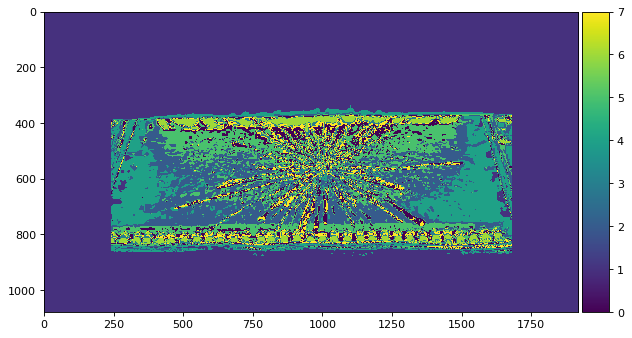

In [5]:
plt.figure(num=None, figsize=(8, 6), dpi=80)
kmeans = KMeans(n_clusters =  4, random_state = 62).fit(df_track)
result = kmeans.labels_.reshape(track.shape[0],track.shape[1])
imshow(result, cmap='viridis')
plt.show()

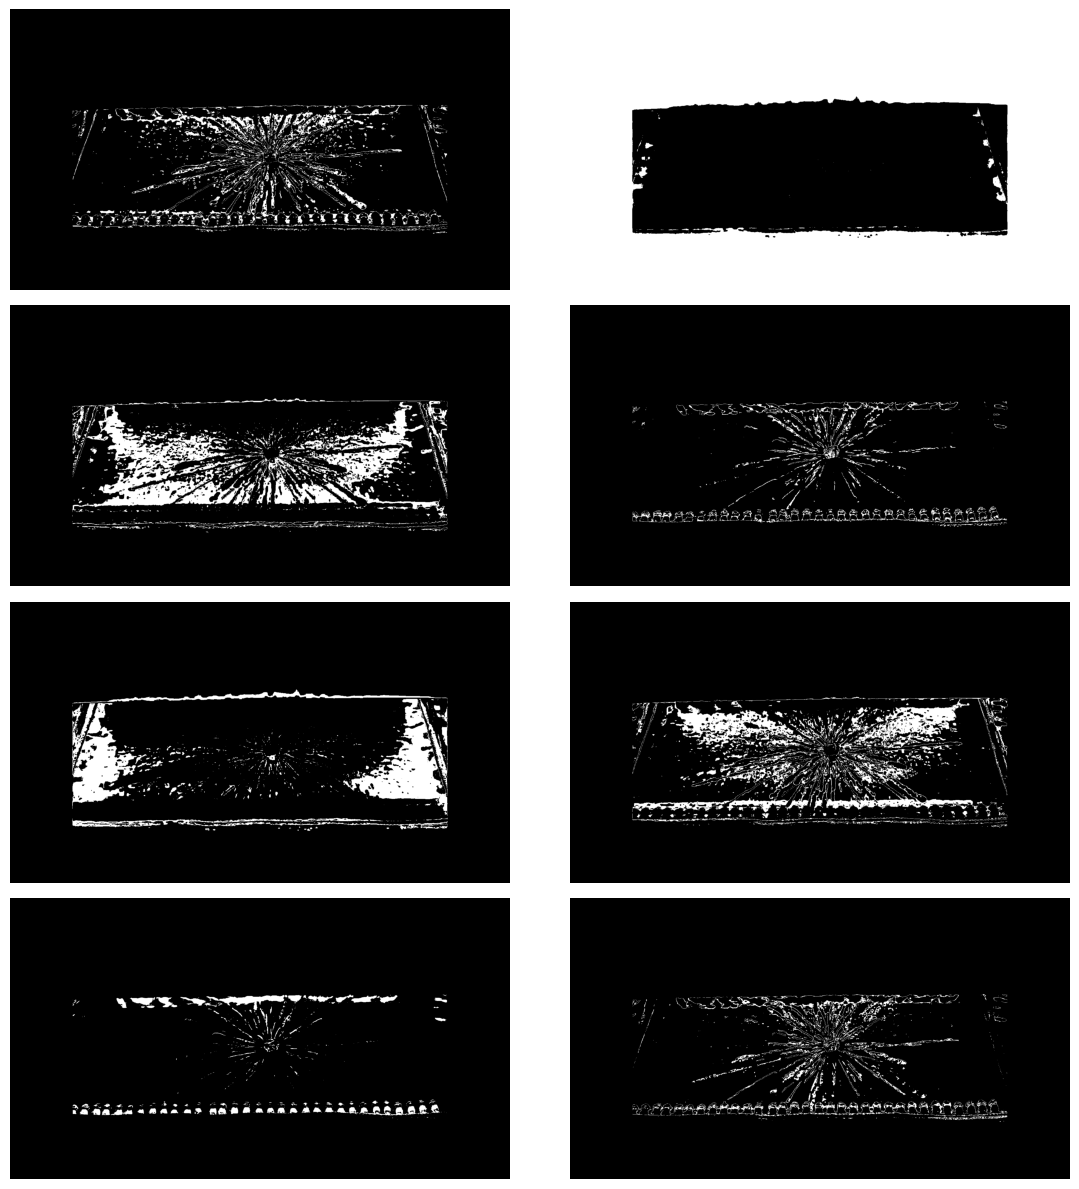

In [6]:
fig, axes = plt.subplots(4,2, figsize=(12, 12))
for n, ax in enumerate(axes.flatten()):
    ax.imshow(result==[n], cmap='gray')
    ax.set_axis_off()
    
fig.tight_layout()